# Opdraht 5 - World Bank Data

In [84]:
import panel as pn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pn.extension('ipywidgets')

In [42]:
filename = '../datasets/World Bank DataBank World Development Indicators/indicators.csv'

In [60]:
df = pd.read_csv(filename, na_values='..', encoding='cp1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   1521 non-null   object 
 1   Country Code   1519 non-null   object 
 2   Series Name    1519 non-null   object 
 3   Series Code    1519 non-null   object 
 4   1974 [YR1974]  751 non-null    float64
 5   1975 [YR1975]  754 non-null    float64
 6   1976 [YR1976]  756 non-null    float64
 7   1977 [YR1977]  758 non-null    float64
 8   1978 [YR1978]  759 non-null    float64
 9   1979 [YR1979]  759 non-null    float64
 10  1980 [YR1980]  772 non-null    float64
 11  1981 [YR1981]  775 non-null    float64
 12  1982 [YR1982]  778 non-null    float64
 13  1983 [YR1983]  779 non-null    float64
 14  1984 [YR1984]  781 non-null    float64
 15  1985 [YR1985]  783 non-null    float64
 16  1986 [YR1986]  786 non-null    float64
 17  1987 [YR1987]  791 non-null    float64
 18  1988 [YR

In [50]:
df[df['Country Code']=='NLD']

,Country Name,Country Code,Series Name,Series Code,1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
973,Netherlands,NLD,GDP (current US$),NY.GDP.MKTP.CD,87243413394.5405,100249523353.085,109168720620.103,127016990212.804,155859695457.323,179669405690.432,...,892167986713.722,765572770634.375,784060430240.08,833869641687.06,914043438179.607,910194347568.626,909793466661.481,1029678338329.44,1009398719033.08,..
974,Netherlands,NLD,"Population, total",SP.POP.TOTL,13545056,13666335,13774037,13856185,13941700,14038270,...,16865008,16939923,17030314,17131296,17231624,17344874,17441500,17533044,17700982,..
975,Netherlands,NLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,74.5368292682927,74.4987804878049,74.6470731707317,75.2214634146342,75.1451219512195,75.6060975609756,...,81.7073170731707,81.509756097561,81.5609756097561,81.7609756097561,81.8121951219512,82.1121951219512,81.3585365853659,81.309756097561,81.7146341463415,..
976,Netherlands,NLD,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,..,..,..,..,..,..,...,5602,4677,4644,4935,5331,5341,5858,6539,..,..
977,Netherlands,NLD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,...,10.57,10.32,10.06,10.11,10.02,10.14,11.21,11.29,..,..
978,Netherlands,NLD,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,..,..,..,..,..,..,...,61615.5860911043,62544.9131401361,63576.4761161142,65041.4591487786,66189.4000984502,67043.1699696165,64080.8302893499,67693.3264311302,69953.6730068751,..
979,Netherlands,NLD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1.77,1.66,1.63,1.58,1.58,1.56,...,1.71,1.66,1.66,1.62,1.59,1.57,1.54,1.62,1.487,..


In [64]:
df_selected = df[df['Series Code'].isin(['SP.POP.TOTL', 'SP.DYN.LE00.IN', 'NY.GDP.PCAP.PP.KD'])].copy()

In [65]:
df_selected[['Country Name', 'Country Code']].value_counts()

Country Name   Country Code
Afghanistan    AFG             3
Pakistan       PAK             3
Nepal          NPL             3
Netherlands    NLD             3
New Caledonia  NCL             3
                              ..
Greece         GRC             3
Greenland      GRL             3
Grenada        GRD             3
Guam           GUM             3
Zimbabwe       ZWE             3
Length: 217, dtype: int64

In [66]:
df_selected[['Series Name', 'Series Code']].value_counts()

Series Name                                          Series Code      
GDP per capita, PPP (constant 2021 international $)  NY.GDP.PCAP.PP.KD    217
Life expectancy at birth, total (years)              SP.DYN.LE00.IN       217
Population, total                                    SP.POP.TOTL          217
dtype: int64

In [67]:
df_melted = df_selected.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                             value_vars=list(df_selected.columns)[4:], 
                             var_name='Year')

df_melted

,Country Name,Country Code,Series Name,Series Code,Year,value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1974 [YR1974],1.186988e+07
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1974 [YR1974],3.955000e+01
2,Afghanistan,AFG,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,1974 [YR1974],NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1974 [YR1974],2.350124e+06
4,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1974 [YR1974],6.776900e+01
...,...,...,...,...,...,...
32545,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023 [YR2023],NaN
32546,Zambia,ZMB,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,2023 [YR2023],NaN
32547,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2023 [YR2023],NaN
32548,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023 [YR2023],NaN


In [72]:
df_pivot = df_melted.pivot(index=['Country Name', 'Country Code', 'Year'], 
                           columns=['Series Name'], 
                           values='value').reset_index()

df_pivot

Series Name,Country Name,Country Code,Year,"GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Population, total"
0,Afghanistan,AFG,1974 [YR1974],NaN,39.550,11869879.0
1,Afghanistan,AFG,1975 [YR1975],NaN,40.100,12157386.0
2,Afghanistan,AFG,1976 [YR1976],NaN,40.645,12425267.0
3,Afghanistan,AFG,1977 [YR1977],NaN,41.228,12687301.0
4,Afghanistan,AFG,1978 [YR1978],NaN,40.271,12938862.0
...,...,...,...,...,...,...
10845,Zimbabwe,ZWE,2019 [YR2019],3412.966690,61.292,15354608.0
10846,Zimbabwe,ZWE,2020 [YR2020],3082.918997,61.124,15669666.0
10847,Zimbabwe,ZWE,2021 [YR2021],3276.267753,59.253,15993524.0
10848,Zimbabwe,ZWE,2022 [YR2022],3420.030280,59.391,16320537.0


In [73]:
df_year = df_pivot[df_pivot['Year'].str.startswith('2022')]

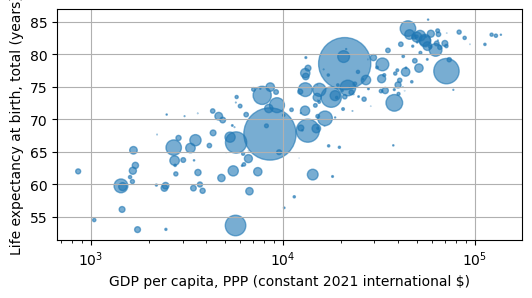

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.set_xscale('log')

sizes = df_year['Population, total'].values / 1000000

ax.scatter(x=df_year['GDP per capita, PPP (constant 2021 international $)'], 
           y=df_year['Life expectancy at birth, total (years)'],
           s=sizes,
           alpha=0.6)

ax.set(xlabel='GDP per capita, PPP (constant 2021 international $)',
       ylabel='Life expectancy at birth, total (years)')

ax.grid()

plt.show()

Column
    [0] Column
        [0] IntSlider(end=6066, name='year', start=-2022, value=2022)
    [1] Row
        [0] Matplotlib(Figure, height=345, name='interactive00186', width=460)
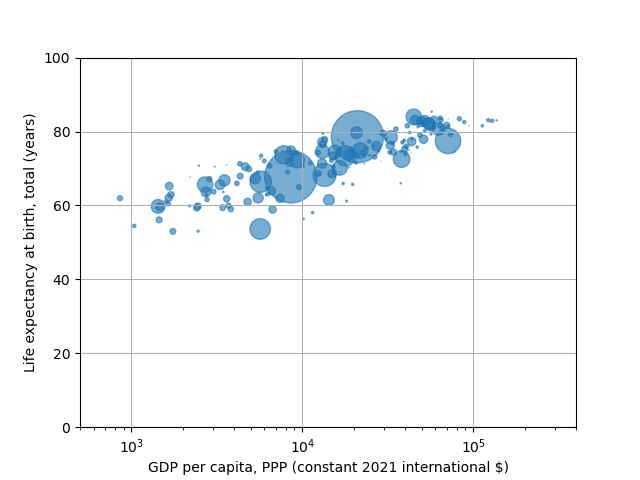

In [96]:
def create_plot(year=2022):
    df_year = df_pivot[df_pivot['Year'].str.startswith(str(year))]
    
    fig, ax = plt.subplots()

    ax.set_xscale('log')
    
    ax.set_ylim(0, 100)
    ax.set_xlim(0.5e3, 4e5)

    sizes = df_year['Population, total'].values / 1000000

    ax.scatter(x=df_year['GDP per capita, PPP (constant 2021 international $)'], 
               y=df_year['Life expectancy at birth, total (years)'],
               s=sizes,
               alpha=0.6)

    ax.set(xlabel='GDP per capita, PPP (constant 2021 international $)',
           ylabel='Life expectancy at birth, total (years)')

    ax.grid()

    plt.close()

    return fig



pn.interact(create_plot, year=2022)